In [1]:
from pypylon import pylon
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from save import save
import cv2
import pytesseract

In [1]:
from PIL import Image, ImageOps

In [89]:
def basler_camera_open():
    camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
    camera.Open()
    camera.PixelFormat = "Mono8"
    #camera.ExposureTime.Value = 2000
    return camera

In [71]:
def basler_camera_close():
    camera.Close()

In [96]:
def basler_camera_grab():

    numberOfImagesToGrab = 1
    camera.StartGrabbingMax(numberOfImagesToGrab)

    while camera.IsGrabbing():
        grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
        if grabResult.GrabSucceeded():
            # Access the image data.
            img = grabResult.Array
            
            #print("Gray value of first pixel: ", img[0, 0])
            
            im=Image.fromarray(img)
            plt.gray
            plt.imshow(im)
        
        grabResult.Release()
    return img
    filename = "saved_pypylon_img_%d.jpeg" % quality
    img.Save(pylon.ImageFileFormat_Jpeg, filename, ipo)
    #camera.Close()

In [93]:
camera=basler_camera_open()

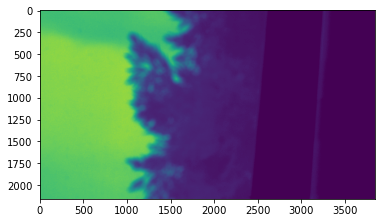

In [103]:

output=basler_camera_grab()

In [15]:
image=Image.fromarray(output,mode='L')

image.show()
image.save("basler_image","JPEG")

In [39]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    print(factor)
    def contrast(c):
        return factor * (c)
    return img.point(contrast)

In [63]:
image_c=change_contrast(image,200)
image_c.show()

7.832834828846793


In [67]:
image_invert=ImageOps.invert(image_c)
image_invert.show()

In [135]:
#   test if tesseract works


' \n\n \n\nCLASS OF 2019!\n\nYOUR DIPLOMA GRANTS YOU MANY NEW\nPOWERS AND PRIVILEGES. THESE INCLUDE:\n\n+ YOU MAY NOW LEGALLY PERFORM\nMARRIAGES AND ARREST PEOPLE.\n\n+ IF YOU HAVE YOUR DIPLOMA WITH YOU,\nYOU CAN USE. GROCERY STORE EXPRESS\nLANES WITH ANY NUMBER OF ITEMS.\n\n+ ALL GRADUATES ARE ENTITLED To\nDELETE ONE WORD OF THEIR CHOICE.\nFROM THE OXFORD ENGUSH DICTIONARY.\n+ THE UNIVERSITY WILL MAIL YOU YOUR’\nWORKING LIGHTSABER WITHIN 6-8 WEEKS.\n* YOU CAN SEND MAIL WITHOUT STAMPS.\n+ YOU HAVE EARNED THE RIGHT TO\nCHALLENGE THE BRITISH ROYAL FAMILY\nTO TRIAL BY COMBAT. IF YOU DEFEAT\nTHEM ALL, THE THRONE |S YOURS.\n\n* YOU MAY NOL IGNORE. "DO NOT PET”\nWARNINGS ON AIRPORT SECURITY DOGS.\n\n= CONGRATULATIONS,\n\n \n\n \n\x0c'